In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [49]:
df = pd.read_csv('AAPL.csv')

In [50]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Brand_Name',
       'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits'],
      dtype='object')

In [51]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [52]:
df.isnull().sum()


date            0
open            0
high            0
low             0
close           0
volume          0
brand_name      0
ticker          0
industry_tag    0
country         0
dividends       0
stock_splits    0
dtype: int64

In [53]:
df.isna().any()

date            False
open            False
high            False
low             False
close           False
volume          False
brand_name      False
ticker          False
industry_tag    False
country         False
dividends       False
stock_splits    False
dtype: bool

In [54]:
df.dtypes

date             object
open            float64
high            float64
low             float64
close           float64
volume          float64
brand_name       object
ticker           object
industry_tag     object
country          object
dividends       float64
stock_splits    float64
dtype: object

In [55]:
# Create a new target column (target) that represents the next day’s close.
df['target'] = df['close'].shift(-1)

In [12]:
df.head()

,date,open,high,low,close,volume,brand_name,ticker,industry_tag,country,dividends,stock_splits,target
0,2010-01-04 05:00:00+00:00,6.469951,6.502387,6.438122,6.487534,493729600.0,apple,AAPL,technology,usa,0.0,0.0,6.498751
1,2010-01-05 05:00:00+00:00,6.505420,6.535431,6.464496,6.498751,601904800.0,apple,AAPL,technology,usa,0.0,0.0,6.395379
2,2010-01-06 05:00:00+00:00,6.498750,6.524518,6.388710,6.395379,552160000.0,apple,AAPL,technology,usa,0.0,0.0,6.383556
3,2010-01-07 05:00:00+00:00,6.419024,6.426603,6.337176,6.383556,477131200.0,apple,AAPL,technology,usa,0.0,0.0,6.425995
4,2010-01-08 05:00:00+00:00,6.375067,6.426602,6.337478,6.425995,447610800.0,apple,AAPL,technology,usa,0.0,0.0,6.369311


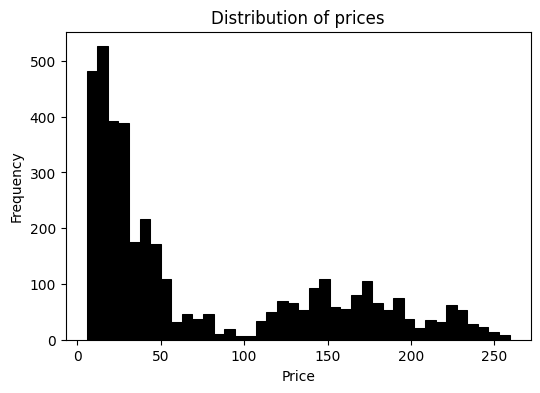

In [56]:
# Exploratory data analysis
plt.figure(figsize=(6, 4))

sns.histplot(df.target, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()


In [57]:
df.isnull().sum()

date            0
open            0
high            0
low             0
close           0
volume          0
brand_name      0
ticker          0
industry_tag    0
country         0
dividends       0
stock_splits    0
target          1
dtype: int64

In [59]:
df.tail(10)

,date,open,high,low,close,volume,brand_name,ticker,industry_tag,country,dividends,stock_splits,target
3945,2025-06-24 04:00:00+00:00,202.589996,203.440002,200.199997,200.300003,53972500.0,apple,AAPL,technology,usa,0.0,0.0,201.559998
3946,2025-06-25 04:00:00+00:00,201.449997,203.669998,200.619995,201.559998,39454000.0,apple,AAPL,technology,usa,0.0,0.0,201.000000
3947,2025-06-26 04:00:00+00:00,201.429993,202.639999,199.460007,201.000000,50667900.0,apple,AAPL,technology,usa,0.0,0.0,201.080002
3948,2025-06-27 04:00:00+00:00,201.889999,203.220001,200.000000,201.080002,73114100.0,apple,AAPL,technology,usa,0.0,0.0,201.080002
3949,2025-06-27 04:00:00+00:00,201.895004,203.220001,200.220001,201.080002,70534466.0,apple,AAPL,technology,usa,0.0,0.0,205.169998
3950,2025-06-30 04:00:00+00:00,202.009995,207.389999,199.259995,205.169998,91612700.0,apple,AAPL,technology,usa,0.0,0.0,207.820007
3951,2025-07-01 04:00:00+00:00,206.669998,210.190002,206.139999,207.820007,78673300.0,apple,AAPL,technology,usa,0.0,0.0,212.440002
3952,2025-07-02 04:00:00+00:00,208.910004,213.339996,208.139999,212.440002,67893400.0,apple,AAPL,technology,usa,0.0,0.0,213.550003
3953,2025-07-03 04:00:00+00:00,212.149994,214.649994,211.809998,213.550003,34955800.0,apple,AAPL,technology,usa,0.0,0.0,213.550003
3954,2025-07-03 04:00:00+00:00,212.145004,214.649994,211.810104,213.550003,34697317.0,apple,AAPL,technology,usa,0.0,0.0,NaN


In [60]:
# Delete the last row using drop()
# To modify the DataFrame in place, set inplace=True
df.drop(df.index[-1], inplace=True)

In [61]:
df.tail(10)

,date,open,high,low,close,volume,brand_name,ticker,industry_tag,country,dividends,stock_splits,target
3944,2025-06-23 04:00:00+00:00,201.630005,202.300003,198.960007,201.500000,55595500.0,apple,AAPL,technology,usa,0.0,0.0,200.300003
3945,2025-06-24 04:00:00+00:00,202.589996,203.440002,200.199997,200.300003,53972500.0,apple,AAPL,technology,usa,0.0,0.0,201.559998
3946,2025-06-25 04:00:00+00:00,201.449997,203.669998,200.619995,201.559998,39454000.0,apple,AAPL,technology,usa,0.0,0.0,201.000000
3947,2025-06-26 04:00:00+00:00,201.429993,202.639999,199.460007,201.000000,50667900.0,apple,AAPL,technology,usa,0.0,0.0,201.080002
3948,2025-06-27 04:00:00+00:00,201.889999,203.220001,200.000000,201.080002,73114100.0,apple,AAPL,technology,usa,0.0,0.0,201.080002
3949,2025-06-27 04:00:00+00:00,201.895004,203.220001,200.220001,201.080002,70534466.0,apple,AAPL,technology,usa,0.0,0.0,205.169998
3950,2025-06-30 04:00:00+00:00,202.009995,207.389999,199.259995,205.169998,91612700.0,apple,AAPL,technology,usa,0.0,0.0,207.820007
3951,2025-07-01 04:00:00+00:00,206.669998,210.190002,206.139999,207.820007,78673300.0,apple,AAPL,technology,usa,0.0,0.0,212.440002
3952,2025-07-02 04:00:00+00:00,208.910004,213.339996,208.139999,212.440002,67893400.0,apple,AAPL,technology,usa,0.0,0.0,213.550003
3953,2025-07-03 04:00:00+00:00,212.149994,214.649994,211.809998,213.550003,34955800.0,apple,AAPL,technology,usa,0.0,0.0,213.550003


In [62]:
# Validation framework
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [63]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

del df_train['target']
del df_val['target']
del df_test['target']

In [64]:
# Linear Regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [65]:
# Baseline solution
base = ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']

In [66]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [67]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [68]:
w_0, w

(np.float64(0.03439261005991591),
 array([-7.67588928e-03,  1.01527885e-01,  4.01599198e-02,  8.65504306e-01,
        -4.91735154e-11, -9.50177566e-01,  3.21084363e-01]))

In [69]:
y_pred = w_0 + X_train.dot(w)

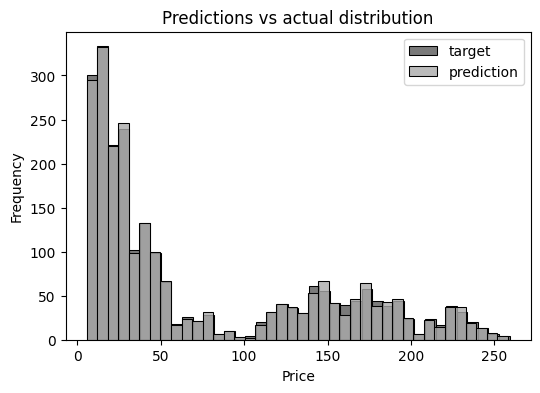

In [71]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

In [72]:
# RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [73]:
rmse(y_train, y_pred)

np.float64(1.7496904503640374)

In [74]:
# Feature Engineering
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['daily_return'] = (df['close'] - df['open']) / df['open']
    features.append('daily_return')
    df['volatility_ratio'] = (df['high'] - df['low']) / df['close']
    features.append('volatility_ratio')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [75]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 1.74961320994746
validation 1.8929764937338347


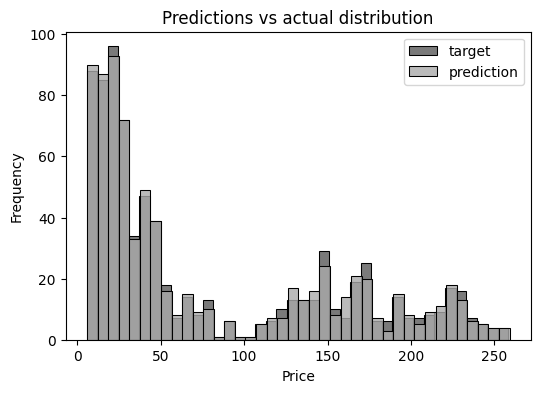

In [76]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

In [78]:
df['date'].value_counts().head(5)

date
2025-01-03 05:00:00+00:00    2
2024-07-12 04:00:00+00:00    2
2024-09-06 04:00:00+00:00    2
2024-12-31 05:00:00+00:00    2
2025-03-28 04:00:00+00:00    2
Name: count, dtype: int64